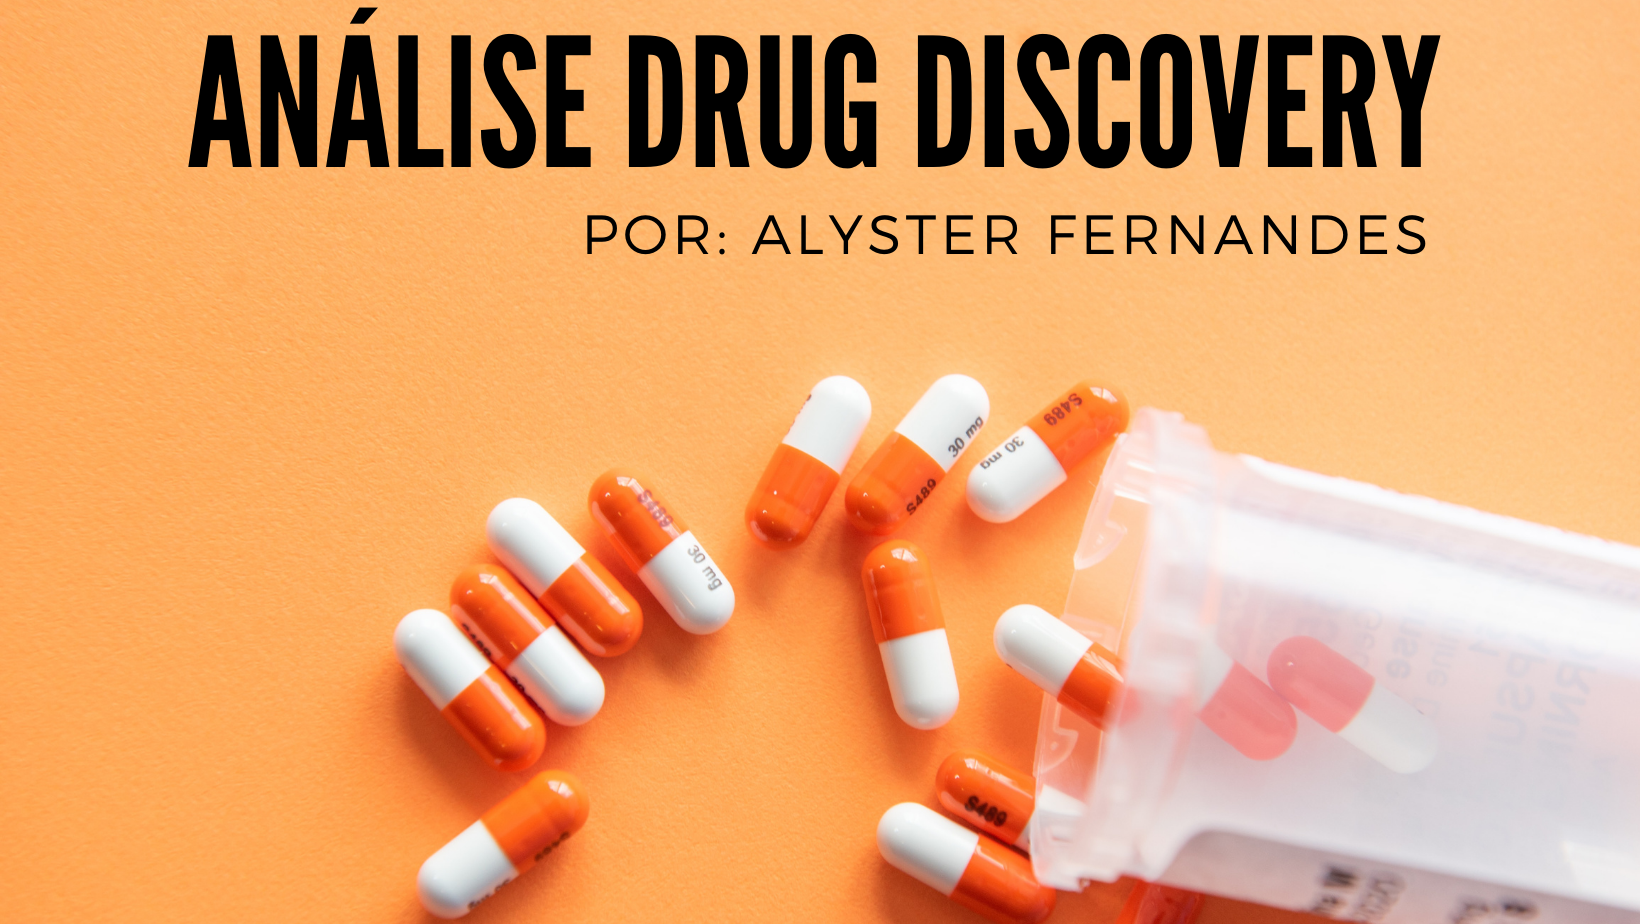
```
Imagem: Cristina Victoria Craft
(a imagem foi editada, o texto não pertence a imagem original)
```




------

##**O que você encontrará aqui**

Esse notebook apresentará insights obtidos durante a análise exploratória, além de apresentar a viabilidade de alguns modelos de machine learning para resolver algumas possíveis previsões com dados de experimentos e resultados para a descoberta de novos fármacos (drug discovery).

O arquivo está organizado da seguinte forma:

1.   **Introdução**

2.   **Pré processamento dos dados**

  *   Importação dos dados e bibliotecas
  *   Entenda as variáveis
  *   Tratamento de dados

3.   **Análise exploratória**

  *   Como os dados estão organizados
  *   Análises estatísticas
  *   Insights obtidos

4.   **Machine Learning**

  *   Preparo dos dados e criação de variáveis dummies
  *   Previsão de ativação de Mechanism of Actions (MoA)
  *   Previsão de compostos
  *   Previsão de tipo de tratamento

5.   **Conclusões**

6.   **Agradecimentos**

7.   **Contatos**

8.   **Referências**

##**Introdução**

O processo de drug discovery [1] existe há milhares de anos, isso porque existem evidências que mostram que há aproximadamente 5 mil anos o uso de ervas medicinais já existia, também existem fármacos que foram descobertos por acaso, mas hoje a exploração de novos fármacos se dá por resultados de experimentos científicos realizados com diferentes genes e tipos de células.

O gene é um trecho do DNA que contém informações para produção de proteínas. O RNA é o que carrega a informação do DNA, e todo esse processo é chamado de expressão gênica [2]. A expressão gênica pode aumentar o diminuir, e leva a síntese de proteínas de acordo com a necessidade. Os dados aqui presentes são resultados da variação da expressão gênica e da viabilidade celular.

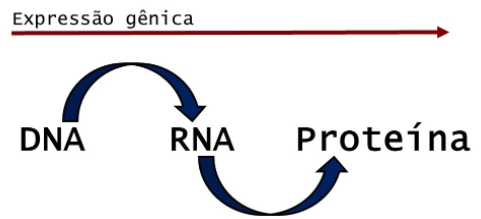




```
Imagem: referência [2] - Alura
```

As bases a serem explorada nesse estudo foram disponibilizada pela Alura, na 3ª edição da Imersão Dados, e esse projeto foi inspirado em um desafio do [Laboratory for Innovation Science at Harvard](https://lish.harvard.edu/) disponibilizando os dados em uma competição no [kaggle](https://www.kaggle.com/c/lish-moa).

As análises aqui apresentadas são extraídas de bases com experimentos e resultados de estudos de compostos químicos aplicados em diferentes genes e tipos celulares. E o principal objetivo é explorar a possibilidade de criar modelos de machine learning que possam prever informações que sirvam de auxílio ao processo de descoberta de novos fármacos.


##**Pré-processamento dos dados**

###Importação dos dados e bibliotecas

In [ ]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Dados de experimentos
urldados = 'https://github.com/AlysterF/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
dados_experimento = pd.read_csv(urldados, compression='zip')

In [ ]:
#Dados de resultados
urldados = 'https://github.com/AlysterF/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'
dados_resultado = pd.read_csv(urldados)

###Entenda as variáveis

**Dados de experimentos**



*   **id** | identificador único do experimento;
*   **tratamento [com_controle, com_droga]** | *com_controle*: grupo não afetado por composto químico, serve de referência para os que são afetados. *com_droga*: grupo afetado por compostos químicos;
*   **g's [g0 até g771]**: genes utilizados para experimento;
*   **c's [c0 até c99]**: tipos celulares utilizados para experimento.

Os valores disponíveis nas colunas de genes são referentes a variabilidade normalizada das expressões gênicas.

Já os valores disponíveis nas colunas de tipos celulares, são referentes a viabilidade celular.


----

**Dados de resultados**

*   **id** | identificador único do resultado;
*   **demais colunas** | as demais colunas são mecanismos de ação ou, como serão mencionados nesse projeto: Mechanism of Action (MoA).

Os mecanismos de ação são registrados como não ativados ou ativados [0, 1]. Temos diversos tipos de MoA na análise de resultados a serem apresentados no decorrer das análises.

###Tratamento de dados

Foram analisados os dataframes para verificar se alguma coluna deveria ou não ser renomeada, além de checar se existem valores faltantes a serem tratados.

In [ ]:
#exibição das 5 primeiras linhas do dataframe de experimento
dados_experimento.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
#exibição das 5 primeiras linhas do dataframe de resultado
dados_resultado.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


A colunas de genes e tipos celulares tem um hífen presente, e para algumas funções do Python, o hífen pode ser um obstáculo. Portanto, o ideal é que sejam removidos ou substituídos por _ (underscore).

In [ ]:
#substituição do hífen presente nas colunas de genes e tipos celulares por ''(vazio)
dados_experimento.columns = dados_experimento.columns.str.replace('-','')

A coluna droga, na verdade se refere a compostos químicos, portanto, para que isso fique mais claro durante a análise é importante renomear a coluna de droga para composto.

In [ ]:
#Renomeação da coluna droga para composto
map = {'droga':'composto'}
dados_experimento.rename(columns=map, inplace=True)
dados_experimento.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Também é importante verificar se algum valor é nulo na base da dados. Isso pode fazer bastante diferença nos resultados.

In [ ]:
#Checar se algum valor é nulo na base de dados de experimento 
dados_experimento.isnull().values.any()

False

In [ ]:
#Checar se algum valor é nulo na base de dados de resultados
dados_resultado.isnull().values.any()

False

Como nenhum dos dataframes tem dados nulos, seguirei para a análise exploratória.

##Análise exploratória

###Como os dados estão organizados

É importante verificar quantas linhas e colunas os dataframes tem, além de verificar se algum valor específico prevalece mais do que os outros, quantos valores únicos existem nas colunas e outras análises pertinentes.

#####Dados de experimento

In [ ]:
#Quantidade de linhas e colunas do DF de experimentos no formato: (linhas, colunas)
dados_experimento.shape

(23814, 877)

In [ ]:
#exibição de dados únicos da coluna tratamento
dados_experimento['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
#exibição de dados únicos da coluna tempo
dados_experimento['tempo'].unique()

array([24, 72, 48])

In [ ]:
#exibição de dados únicos da coluna dose
dados_experimento['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [ ]:
#exibição de dados únicos da coluna composto
dados_experimento['composto'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Parecem que existem muitos compostos diferentes, é possível saber quantos compostos distintos existem no dataframe utilizando a função nunique().

In [ ]:
#contagem distinta do número de compostos
dados_experimento['composto'].nunique()

3289

#####Dados de resultados

In [ ]:
#Quantidade de linhas e colunas do DF de experimentos no formato: (linhas, colunas)
dados_experimento.shape

(23814, 877)

In [ ]:
#Conhecer os valores possíveis de uma das colunas
dados_resultado.acat_inhibitor.unique()

array([0, 1])

In [ ]:
#Contagem de ativações por mecanismos de ação
contagem_moa = dados_resultado.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [ ]:
#Dataframe da contagem de valores por MoA
contagem_moa = pd.DataFrame(data={'contagem':dados_resultado.drop('id', axis=1).sum().sort_values(ascending=False),
                                  'moa':contagem_moa.index})

In [ ]:
#criação de um índice númerico
contagem_moa.index = pd.RangeIndex(start=0, stop=len(contagem_moa), step=1)

In [ ]:
#impressão do head
contagem_moa.head()

,contagem,moa
0,832,nfkb_inhibitor
1,726,proteasome_inhibitor
2,435,cyclooxygenase_inhibitor
3,424,dopamine_receptor_antagonist
4,404,serotonin_receptor_antagonist


###Análises estatísticas

####Proporção dos dados

Uma das primeiras análises interessantes nessa base de dados, é explorar qual a proporção dos dados únicos nas colunas. Assim, é possível descobrir se os as doses são aplicadas de forma balanceada, assim como os compostos.

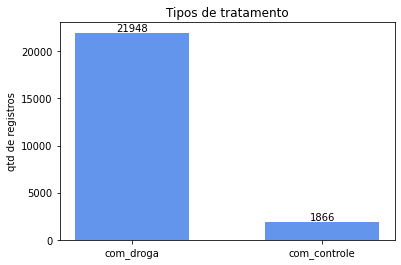

In [ ]:
#gráfico de colunas da contagem do tipo de tratamento

x = ['com_droga','com_controle']
y = dados_experimento['tratamento'].value_counts()

barras = plt.bar(x, height=y, width=.6, color='cornflowerblue')
plt.title('Tipos de tratamento')
plt.ylabel('qtd de registros')

for cada_barra in barras:
    valor_y = cada_barra.get_height()
    plt.text(cada_barra.get_x()+0.3, valor_y, valor_y,horizontalalignment='center', verticalalignment='bottom')

Parece que os dados bem desbalanceados no tipo de tratamento, mas é bom checar exatamente essa proporção.

In [ ]:
#% de proporção dos diferentes valores da coluna tratamento
dados_experimento['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Visto esse desbalancemento, decidi explorar um pouco mais o grupo com_controle, e como sabemos que o grupo com_controle não deve ser afetado por compostos químicos, podemos checar se isso realmente é refletido nos dados.

In [ ]:
#criação de um novo dataframe com apenas os dados do grupo de tratamento com_controle
dados_exp_comcontrole = dados_experimento.query('tratamento == "com_controle"')

In [ ]:
#Contagem de diferentes compostos no grupo com controle
dados_exp_comcontrole['composto'].value_counts()

cacb2b860    1866
Name: composto, dtype: int64

Temos apenas um composto no grupo com controle, e isso explica o porque do desbalanceamento comparado ao grupo que é tratamento com algum composto.

Isso pode resultar em um desbalanceamento nas outras configurações de aplicação dos compostos, como na distribuição das diferentes doses e tempo.

In [ ]:
#contagem dos valores da coluna tempo
dados_experimento['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [ ]:
#% de proporção dos diferentes valores da coluna tempo
dados_experimento['tempo'].value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

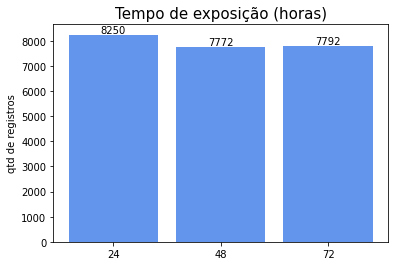

In [ ]:
#gráfico de barras (tempo)
x = dados_experimento['tempo'].unique()
y = dados_experimento['tempo'].value_counts()

barras = plt.bar(x, height=y, width=20, color='cornflowerblue')
plt.title('Tempo de exposição (horas)',fontsize=15)
plt.ylabel('qtd de registros')
plt.xticks(x)

for cada_barra in barras:
    valor_y = cada_barra.get_height()
    plt.text(cada_barra.get_x()+10, valor_y, valor_y,horizontalalignment='center', verticalalignment='bottom')

Os valores de tempo são extremamente balanceados, vamos ver se isso se repete nas doses.

In [ ]:
#contagem dos valores da coluna dose
dados_experimento['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [ ]:
#% de proporção dos diferentes valores da coluna dose
dados_experimento['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

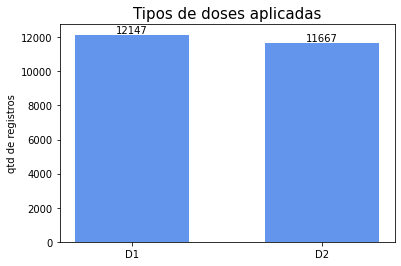

In [ ]:
#gráfico de barras (dose)

x = dados_experimento['dose'].unique()
y = dados_experimento['dose'].value_counts()

barras = plt.bar(x, height=y, width=.6, color='cornflowerblue')
plt.title('Tipos de doses aplicadas',fontsize=15)
plt.ylabel('qtd de registros')

for cada_barra in barras:
    valor_y = cada_barra.get_height()
    plt.text(cada_barra.get_x()+0.3, valor_y, valor_y,horizontalalignment='center', verticalalignment='bottom')

Os dados parecem bem balanceados para as aplicações de doses diferentes também.

Apesar do desbalanceamento comparado a quantidade de assinaturas de cada grupo de tratamento, os dados ainda podem seguir um padrão balanceado se combinarmos as possíveis configurações de doses e tempo.

In [ ]:
#Tabela de frequência por dose, tempo e tratamento.
pd.crosstab([dados_experimento['dose'], dados_experimento['tempo']],  dados_experimento['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

Veja que os dados estão bem balanceados, independentemente da proporção de registros em cada grupo de tratamento.

Descobri também quais são os compostos mais utilizados nos estudos. Mas perceba que eu estou ignorando o composto cacb2b860, pois já sabemos que o mesmo está presente apenas no grupo com_controle, ou seja, pode ser um placebo.

In [ ]:
#Top 5 compostos, ignorando o cacb2b860
idx_compostos = dados_experimento['composto'].value_counts().index[1:6]
idx_compostos

Index(['87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee', 'd08af5d4b'], dtype='object')

No gráfico abaixo fica mais claro que há um outro composto extremamente utilizado nesse estudo, se comparado aos demais.

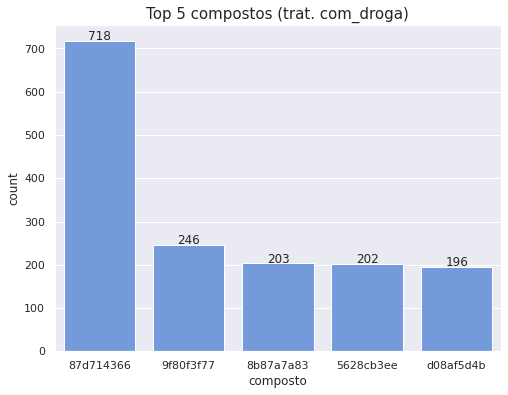

In [ ]:
dados_top5 = dados_experimento.query('composto in @idx_compostos')

sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=dados_top5,
                   order = dados_top5['composto'].value_counts().index, color='cornflowerblue')
ax.set_title('Top 5 compostos (trat. com_droga)',fontsize=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.275, p.get_height()+2))
plt.show()

Nos dados de resultados tempos diversos Mecanismos de Ação (MoA). Decidi verificar também como estão distribuidas as ativações nos diferentes tipos de MoA.

In [ ]:
#Criação de um dataframe com a classificação do MoA
classe_MOA = pd.DataFrame(data={'classe':[row.split('_')[-1] for row in contagem_moa['moa']], 'moa':contagem_moa['moa']})
classe_MOA

,classe,moa
0,inhibitor,nfkb_inhibitor
1,inhibitor,proteasome_inhibitor
2,inhibitor,cyclooxygenase_inhibitor
3,antagonist,dopamine_receptor_antagonist
4,antagonist,serotonin_receptor_antagonist
...,...,...
201,inhibitor,protein_phosphatase_inhibitor
202,inhibitor,autotaxin_inhibitor
203,diuretic,diuretic
204,inhibitor,erbb2_inhibitor


In [ ]:
#Junção dos dois dataframes
contagem_moa = contagem_moa.merge(classe_MOA)

In [ ]:
#Impressão do head
contagem_moa.head()

,contagem,moa,classe
0,832,nfkb_inhibitor,inhibitor
1,726,proteasome_inhibitor,inhibitor
2,435,cyclooxygenase_inhibitor,inhibitor
3,424,dopamine_receptor_antagonist,antagonist
4,404,serotonin_receptor_antagonist,antagonist


Agora que todos os dados estão juntos, é possível analisar os MoA que mais aparecem.

In [ ]:
#Separação dos top 10 MoA
top10_moa = contagem_moa.groupby(by='classe').sum()['contagem'].sort_values(ascending=False)[:10]

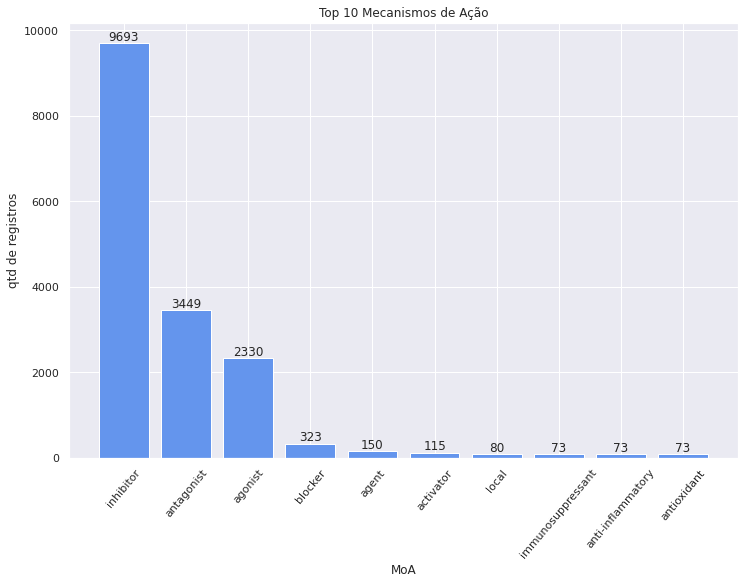

In [ ]:
#Plot dos top 10 MoA em um gráfico de colunas

#Tamanho do espaço para o gráfico
plt.figure(figsize=(12,8))

#Associação de cada coluna do gráfico a uma variável, pois utilizaremos no loop para colocar valores
barras = plt.bar(x=top10_moa.index, height=top10_moa, width=.8, color='cornflowerblue')

#Definição de labels e título
plt.xlabel('MoA')
plt.title('Top 10 Mecanismos de Ação')
plt.ylabel('qtd de registros')

#Rotação dos labels do eixo x
plt.xticks(rotation=50)

#Inserção do rótulo de dados acima de cada coluna
for cada_barra in barras:
    valor_y = cada_barra.get_height()
    plt.text(cada_barra.get_x()+0.4, valor_y, valor_y,horizontalalignment='center', verticalalignment='bottom')

####Análise de distribuição dos dados

Em nosso dataframe, temos dois grupos implícitos: os grupos de genes (iniciados pela letra g) e os grupos de tipos celulares (iniciados pela letra c). Criarei dois dataframes para procurar entender melhor o comportamento dos mesmos.

In [ ]:
#criação do dataframe de genes
dados_exp_genes = dados_experimento.loc[:,'g0':'g771']

In [ ]:
#criação do dataframe de tipos celulares
dados_exp_tpcelular = dados_experimento.loc[:,'c0':]

#####Distribuição das expressões gênicas

Apliquei a fórmula de sturges para definir a quantidade de intervalos ideal para o histograma, baseado na quantidade de dados disponíveis.

In [ ]:
#fórmula de sturges
n = dados_exp_genes.value_counts().sum()
k = int(round(1 + (10/3) * np.log10(n)))

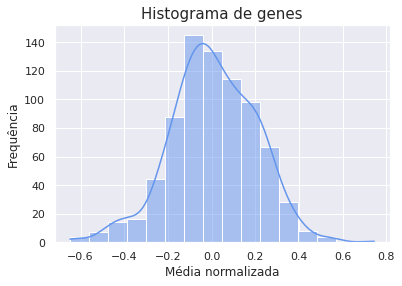

In [ ]:
#histograma das médias dos dados de genes
fig = sns.histplot(data=dados_exp_genes.describe().T,x='mean',bins=k,color='cornflowerblue', kde=True)
plt.xlabel('Média normalizada')
plt.ylabel('Frequência')
plt.title('Histograma de genes',fontsize=15)
plt.show(fig)

Observando o histograma acima, é possível ver que os dados se aproximam de uma distribuição normal, ou seja, os dados ficam mais concentrados próximo a média.
É interessante avaliar também se esses mesmos valores apresentam outliers. E um dos melhores métodos para visualizar isso é utilizando boxplots.

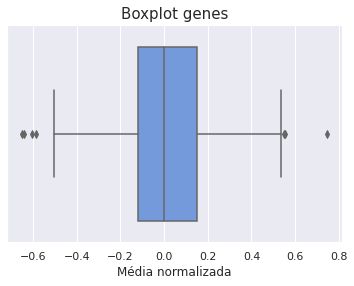

In [ ]:
#boxplot genes

fig = sns.boxplot(x=dados_exp_genes.describe().T['mean'], color='cornflowerblue')
plt.xlabel('Média normalizada')
plt.title("Boxplot genes",fontsize=15)
plt.show(fig)

Alguns outliers foram indicados no boxplot acima. E o que isso quer dizer?

Os outliers são valores que ficam fora de limites estabelecidos dentro de algumas regras. São considerados, além dos quartis, um valor máx e min a ser considerado, e qualquer valores acima do máximo ou abaixo do mínimo, é considerado um outlier. Ou seja, os outliers são dados que fogem do esperado.

Às vezes os outliers são excluídos da análise, principalmente quando se procura criar um modelo de machine learning. Porém, em determinadas análises, os outliers podem ser exatamente o que você está procurando.

#####Distribuição da viabilidade celular

Para a viabilidade celular, seguirei o mesmo padrão de análise.

In [ ]:
#fórmula de sturges
n = dados_exp_tpcelular.value_counts().sum()
k = int(round(1 + (10/3) * np.log10(n)))

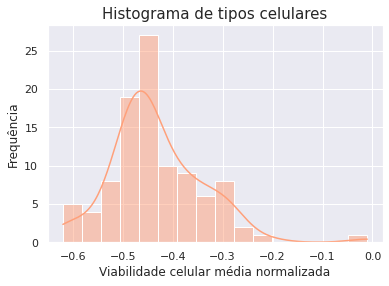

In [ ]:
#histograma das médias dos dados de genes
fig = sns.histplot(data=dados_exp_tpcelular.describe().T,x='mean', bins=k, color='lightsalmon', kde=True)
plt.xlabel('Viabilidade celular média normalizada')
plt.ylabel('Frequência')
plt.title('Histograma de tipos celulares',fontsize=15)
plt.show(fig)

É claramente visível que o comportamento dos resultados de viabilidade celular não estão distribuídos da mesma forma que os dados de expressões gênicas.

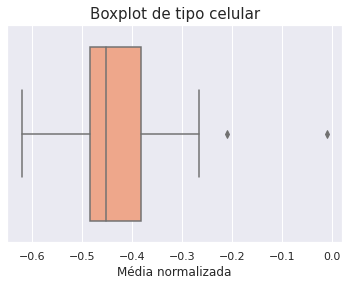

In [ ]:
#boxplot tipos celulares
fig = sns.boxplot(x=dados_exp_tpcelular.describe().T['mean'],color='lightsalmon')
plt.xlabel('Média normalizada')
plt.title('Boxplot de tipo celular',fontsize=15)
plt.show(fig)

Também há poucos outliers nos dados de viabilidade celular, e os dados estão mais concentrados. Para ficar mais claro o comparativo dos dois boxplots, juntei os dois.

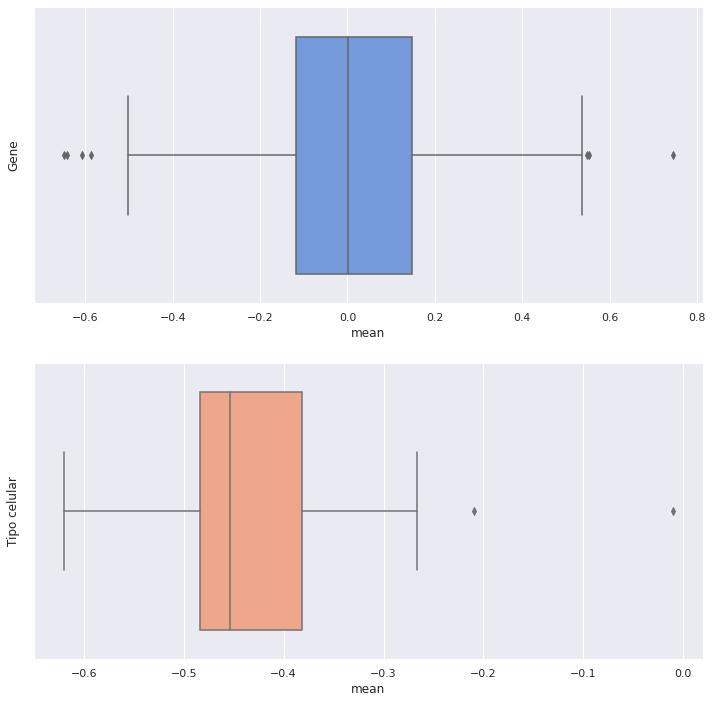

In [ ]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(12)
ax[0].set_ylabel('Gene')
sns.boxplot(x=dados_exp_genes.describe().T['mean'], color='cornflowerblue', ax=ax[0])
ax[1].set_ylabel('Tipo celular')
sns.boxplot(x=dados_exp_tpcelular.describe().T['mean'],color='lightsalmon', ax=ax[1])
fig.show()

####Ativações de MoA

In [ ]:
#head resultados
dados_resultado.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Os dados de resultado tem diversas colunas, com diversos mecanismos de ação, e seria interessante ter colunas que indicassem quantos MoA foram ativados e se sequer houve uma ativação ou não, de forma rápida.

In [ ]:
#Criação da coluna com número de MoA ativados
dados_resultado['n_moa'] = dados_resultado.drop('id', axis=1).sum(axis=1)

In [ ]:
#Criação da coluna que mostra se foi ativado ou não
dados_resultado['ativo_moa'] = (dados_resultado['n_moa'] != 0)
dados_resultado.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


O ID está disponível em ambos os dataframes, e isso nos permite juntar os dois dataframes em um só.

In [ ]:
#merge dos dataframes
dados = pd.merge(dados_experimento, dados_resultado[['id','n_moa', 'ativo_moa']], on='id')
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Agora é possível verificar o total de MoA ativados, por exemplo.

In [ ]:
#Total de MoA ativados
dados.n_moa.sum()

16844

Espera-se em um experimento científico, que nenhum MoA seja ativado no grupo de controle.

In [ ]:
#Check se algum MoA foi ativado no grupo de controle
dados.query('tratamento == "com_controle"').n_moa.sum()

0

E os dados confirmam que não há nenhuma ativação de MoA no grupo de controle, e os 16844 MoA ativados foram resultados das aplicações de compostos químicos.

####Reação em função dos compostos

Decidi explorar alguns compostos que são aplicados com mais frequência para explorar melhor a reação de um gene.

In [ ]:
#seleção dos 10 principais compostos, ignorando o primeiro que se refere ao placedo do grupo com_controle 
principais_compostos = dados['composto'].value_counts().index[1:11]

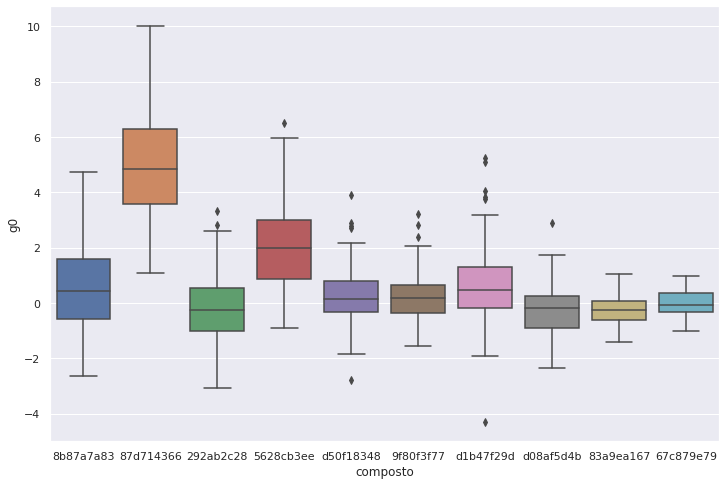

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data = dados.query('composto in @principais_compostos'), y='g0', x='composto')

É possível perceber que o composto 87d714366 tem grandes variações de seus valores. Portanto, decidi explorar um pouco mais essa variabilidade em função de tempo e dose.

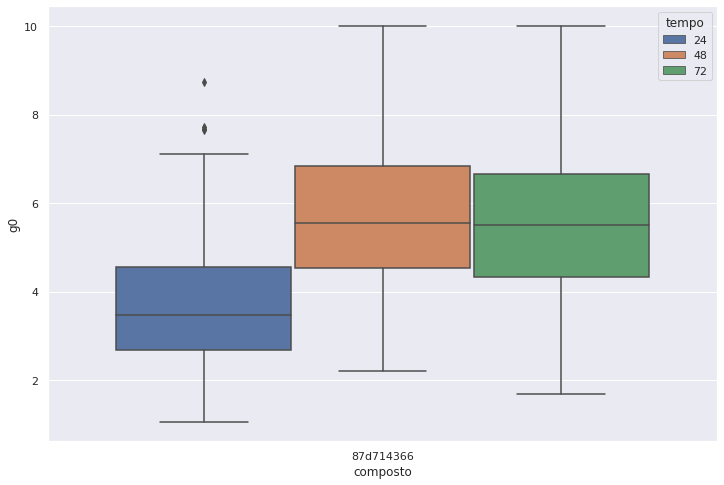

In [ ]:
#Boxplot do composto 87d714366 por tempo.
plt.figure(figsize=(12,8))
sns.boxplot(data = dados.query('composto == "87d714366"'), y='g0', x='composto', hue='tempo')

O composto verificado parece reagir no gene 0 a partir das 48h. Isso pode mudar em função das doses também.

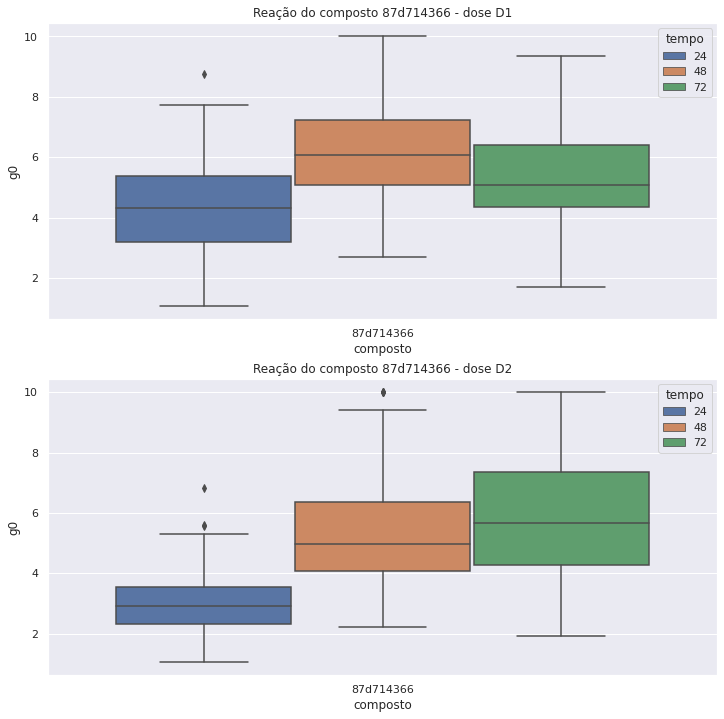

In [ ]:
#Boxplots do composto 87d714366 por tempo e dose.
fig, ax = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(12)
ax[0].set_title('Reação do composto 87d714366 - dose D1')
sns.boxplot(data = dados.query('composto == "87d714366" & dose == "D1"'), y='g0', x='composto',hue='tempo', ax=ax[0])
ax[1].set_title('Reação do composto 87d714366 - dose D2')
sns.boxplot(data = dados.query('composto == "87d714366" & dose == "D2"'), y='g0', x='composto',hue='tempo', ax=ax[1])
plt.show(fig)

Parece que a dose 1 tem um efeito maior nas 48h e a partir de 72h a reação diminui. Diferentemente da dose 2, que continua a aumentar a sua reação até as 72h.

####Correlações

Um dos métodos mais famosos para visualizar correlações é o gráfico de dispersão (scatterplot). Portanto, iniciei com o uso desse gráfico para verificar se há a possibilidade de existir alguma correlação dos genes entre si e entre os tipos celulares. 

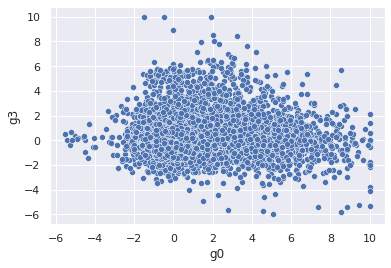

In [ ]:
#Scatterplot gene 3 em função do gene 0
sns.scatterplot(x='g0', y = 'g3', data=dados_experimento)

Usando como exemplo os genes 0 e 3 parece que a aleatoriedade é grande.

Para ter certeza que é aleatório, podemos verificar numericamente a correlação entre os dois genes, se o número foi próximo de 1, a correlação é forte, se próxima a -1, a correlação ainda é forte, mas negativa (apresenta um declínio). Quanto mais próxima de zero, a correlação enfraquece.

In [ ]:
#Correlação entre o gene e gene 3
dados_experimento.loc[:,['g0','g3']].corr()

,g0,g3
g0,1.000000,0.011266
g3,0.011266,1.000000


O resultado foi de cerca de 0.11 de correlação, o que indica que o valor é extremamente fraco e, consequentemente, aleatório.

Podemos testar com outro gene para ter certeza se pode vir a existir ou não uma correlação entre genes.

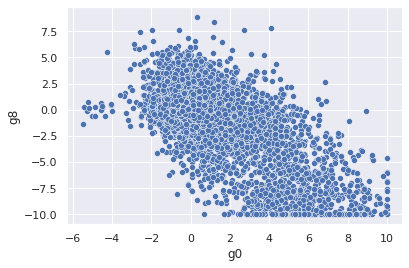

In [ ]:
sns.scatterplot(x='g0', y = 'g8', data=dados_experimento)

A correlação entre os genes 0 e 8 parece existir. Para verificar, podemos medir novamente a correlação numericamente.

In [ ]:
dados_experimento.loc[:,['g0','g8']].corr()

,g0,g8
g0,1.000000,-0.604212
g8,-0.604212,1.000000


A correlação ficou com cerca de -0.6 e isso pode ter certa significância, e vale ressaltar que o sinal negativo indica a direção dos resultados, nesse caso um declínio do valor. Para que isso fique mais claro, é possível exibir uma linha junto ao gráfico de distribuição.

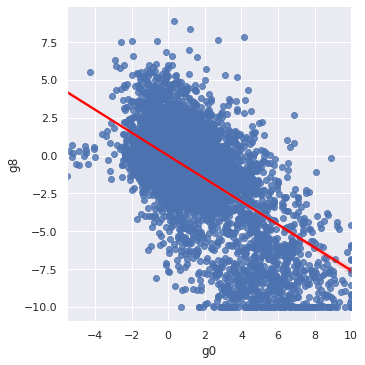

In [ ]:
#Gráfico de distribuição com linha de tendência
sns.lmplot(data=dados_experimento, x='g0', y='g8', line_kws={'color': 'red'})

Essa distribuição de valores pode ser efeito da aplicação de algum composto químico, e para checar se isso é verdade podemos exibir o mesma gráfico de dispersão com a separação por tipo de tratamento.

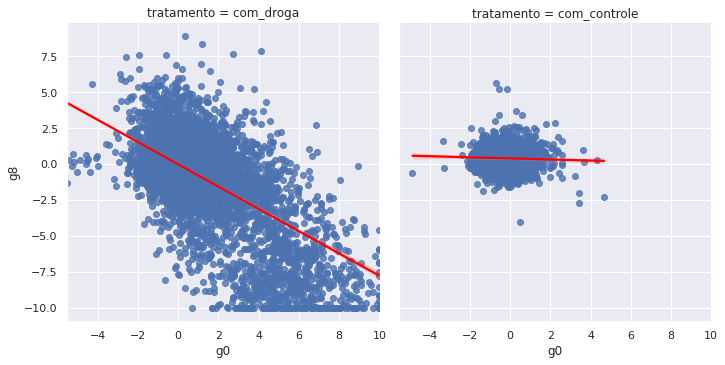

In [ ]:
#Gráfico de dispersão separado por tratamento
sns.lmplot(data=dados_experimento, x='g0', y='g8', line_kws={'color': 'red'}, col='tratamento')

Como temos diversos dados e, consequentemente, diversas combinações possíveis, um método mais fácil de visualizar as correlações é a matriz de correlação.

A matriz de correlação é extremamente visual, e se usarmos um mapa de calor é possível utilizar uma escala de cores para exibir quais dados estão ou não correlacionados.

Trabalhei apenas com grupos menores de genes e tipos celulares, para que a matriz de correlação fique com a visualização mais simples.

In [ ]:
#Cria uma variável com os valores de correlação dos genes 0 a 50.
corr = dados_experimento.loc[:,'g0':'g50'].corr()

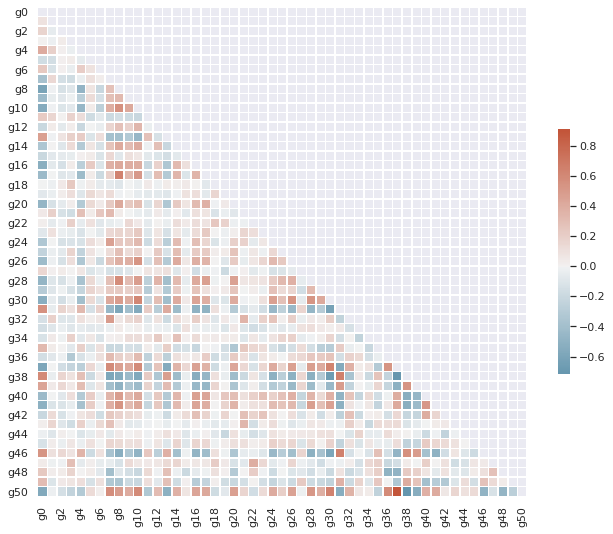

In [ ]:
#np.triu = retorna uma cópia dos valores de um array que se posicionam acima da diagonal. (triangulo superior)
#np.ones_like = retorna o array selecionado, substituindo os valores por 1
#Cria uma máscara para o triângulo superior direito
mask = np.triu(np.ones_like(corr, dtype=bool))

#configurações do plot
f, ax = plt.subplots(figsize=(11, 9))

# Cria uma escala de cores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# cria o heatmat com os dados indicados e indica a forma quadrada
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Rapidamente podemos ver que há uma correlação negativa entre o gene 8 e o gene 0, conforme analisado anteriomente.

E agora também enxergamos uma correlação positiva forte entre o gene 50 e o gene 37. Para checar, podemos verificar o valor de correlação.

In [ ]:
dados_experimento.loc[:,['g37','g50']].corr()

,g37,g50
g37,1.000000,0.907061
g50,0.907061,1.000000


Uma correlação de cerca de 0.9 é extremamente forte.

Os genes não parecem se correlacionar muito entre si. E é possível que os tipos celulares se comportem da mesma forma.

In [ ]:
#Cria uma variável com os valores de correlação dos tipos celulares 0 a 50.
corr_celular = dados_experimento.loc[:,'c0':'c50'].corr()

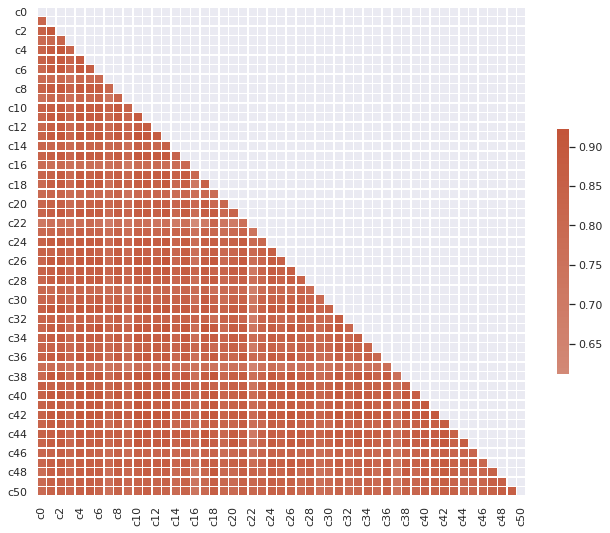

In [ ]:
#Cria uma máscara para o triângulo superior direito
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

#configurações do plot
f, ax = plt.subplots(figsize=(11, 9))

# Cria uma escala de cores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# cria o heatmat com os dados indicados e indica a forma quadrada
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Fica claro que os tipos celulares na verdade se comportam de forma totalmente diferente e que a viabilidade celular de uma célula tem uma alta correlação entre as outras.

Uma exploração também interessante é a correlação entre genes e células.

In [ ]:
#Cria variável com a correlação entre genes e tipos celulares
corr_g_c = dados_experimento.corr().loc['g0':'g50','c0':'c50']

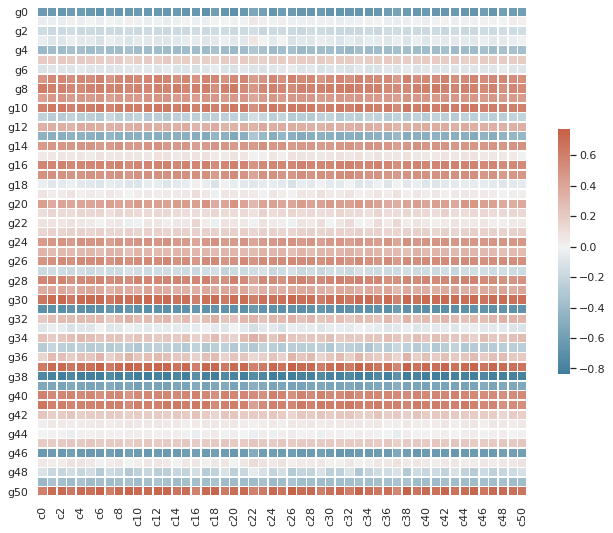

In [ ]:
#configurações do plot
f, ax = plt.subplots(figsize=(11, 9))

# Cria uma escala de cores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# cria o heatmat com os dados indicados e indica a forma quadrada
sns.heatmap(corr_g_c, mask=None, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Parece que alguns genes específicos tem alta correlação com todas as células, enquanto outros tem correlação praticamente nula e isso pode nos levar a alguns insights.

###Insights obtidos

####Proporção dos grupos de tratamento

Os grupos de tratamento tiveram proporções extremamente desbalanceadas:

*   com_droga       0.921643
*   com_controle    0.078357

Isso ocorre porque um grupo de controle [3] pode servir de referência para diversos experimentos feitos. Visto que temos diversas combinações de dose, tempo e compostos possíveis, é esperado que tenhamos mais registros no grupo tratado com algum composto.

É importante dizer também que visto que um dos compostos da base de dados aparece apenas no grupo de controle. Esse composto é provavelmente um placebo.

####Ativações de MoA

É esperado que nenhum mecanismo de ação se ative no grupo de controle, pois esse grupo não recebe nenhum composto químico. E os dados nos mostraram que realmente temos **0 ativações de MoA no grupo de controle**. Já **o grupo experimental ativou 16844 MoA**.

####Reação dos genes aos compostos

Os genes podem ter uma reação mais forte a alguns compostos após algum tempo de exposição. O composto 87d714366 por exemplo, tem uma reação mais significativa após 48h.

E isso também varia em função da dose aplicada, visto que na aplicação da dose D1 para o mesmo composto, a reação aumenta após 48h mas começa a diminuir após 72h. Já na aplicação da dose D2, a reação continua a aumentar após 72h.

####Correlações entre genes e compostos

Foi visto na matriz de correlação entre genes e tipos celulares que alguns genes tinham correlação alta todas as células.

É possível que esse resultado de alta correlação se dê para os genes que exercem funções vitais para uma célula, por isso quando surge uma correlação alta, ela se repete por todas as células.

Também foi possível enxergar altas correlações entre as próprias células, mas vale ressaltar aqui que correlação não resulta em causalidade. Portanto, os dados das células se correlacionarem, não quer dizer que a variação de uma célula afeta diretamente a outra.

##Machine Learning

Foram utilizados diversos modelos de machine learning para testar a viabilidade de uso de modelos para responder as previsões abaixo:


*   Previsão de ativação de Mechanism of Action
*   Previsão de quantidade de Mechanism of Action ativos
*   Previsão de compostos
*   Previsão de tipo de tratamento



Vale ressaltar também, que as bibliotecas de machine learning foram importadas conforme a necessidade, portanto, elas estão nas células do seu respectivo modelo.

###Preparo dos dados e criação de variáveis dummies

Alguns modelos de machine learning requerem que os dados a serem utilizados para treino e validação sejam númericos. Como temos diversos campos categóricos, como por exemplo tratamento, é necessário criar variáveis dummies para categoria.

As variáveis dummies são variáveis numéricas referentes as categorias, por exemplo, se temos dois grupos de tratamento, sendo eles: com_droga e com_controle, após a aplicação de variáveis dummies, serão geradas colunas chamadas tratamento_com_droga e tratamento_com_controle, recebendo 0 caso seja False e 1 caso seja True.

In [ ]:
#Criação do dataframe com os dados dummies
dados_dummies = pd.get_dummies(dados, columns=['tratamento','dose', 'tempo'])
dados_dummies.head()

,id,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,...,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,1,0,1,0,0,1


###Previsão de ativação de Mechanism of Action (MoA)

####Dados de treino e validação

Em um modelo de machine learning é importante separar uma proporção de dados para treinar o modelo e para validar. Assim, após treinar, você tem uma base de dados para validar e entender como o modelo vai se comportar ao receber dados nunca vistos.

In [ ]:
#Importação da biblioteca de split de dados de treino e validação
from sklearn.model_selection import train_test_split

In [ ]:
#seleciona apenas os valores que sejam float no dataframe
x = dados_dummies.select_dtypes('float64')
#seleciona a coluna booleano ativo_moa (variável resposta)
y = dados_dummies['ativo_moa']
#extrai as amostras de treino e teste, sendo a de teste 20% do total
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=847)

####Modelo de regressão logística

O modelo de regressão logística [4] utiliza um conjunto de dados para chegar a uma equação que traga a variável buscada como resposta. Os modelos de regressão linear também funcionam dessa forma, porém, o modelo de regressão logística tem uma variável resposta binária 0 ou 1, sendo 'sucesso' ou 'fracasso', sendo o sucesso o evento de interesse. O modelo se encaixa no meu objetivo de prever se um MoA foi ativado ou não.

In [ ]:
#importação da biblioteca de regressão logística
from sklearn.linear_model import LogisticRegression

Como já separei a base de treino e de validação, já é possível efetuar o treino e obter a acurácia de previsão com base nos dados de validação/teste.

In [ ]:
#associação do modelo de regressão logística a uma variável
modelo_rlogistica = LogisticRegression(max_iter=1000)
#treino do modelo
modelo_rlogistica.fit(x_treino, y_treino)
#score do modelo (acurácia)
modelo_rlogistica.score(x_teste, y_teste)

0.63615368465253

####Dummy classifier

É importante comparar os resultados obtidos em um dummy classifier [5], pois através de um dummy, podemos testar modelos que trabalham com resultados super simples, como por exemplo: suponha que todos os valores ativem MOA.

Assim, espera-se que esse modelo seja significativamente inferior ao modelo de regressão logística baseado nas assinaturas oficiais.

In [ ]:
#Importação das bibliotecas
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6067604450976275

Perceba que resultado não parece satisfatório, visto que o modelo está pouco acima do resultado do dummy. Vou testar com outro tipo de modelo. Um modelo famoso é a árvore de decisão.

####Modelo de árvore de decisão

O modelo de árvore de decisão [6] o resultado é obtido a partir de um nó raiz que se divide em dois grupos, gerando assim, outros nós que se baseiam em outros dados para se dividirem novamente até chegar aos nós folhas que são, efetivamente, as classificações. O modelo de árvore de decisão pode ter diversas profundidades e isso pode ser determinado com bastante flexibilidade.

In [ ]:
#Importação da biblioteca de árvore de decisão
from sklearn.tree import DecisionTreeClassifier

Usarei os mesmos dados de treino e teste esse modelo. E determinei a profundidade da árvore de decisão em 3.

In [ ]:
#Setar em uma variável o modelo de árvore de decisão e definir como parâmetro a sua profundidade (níveis)
modelo_arvore = DecisionTreeClassifier(max_depth=3)
#treino
modelo_arvore.fit(x_treino, y_treino)
#Score de acurácia
modelo_arvore.score(x_teste, y_teste)

0.6178878857862692

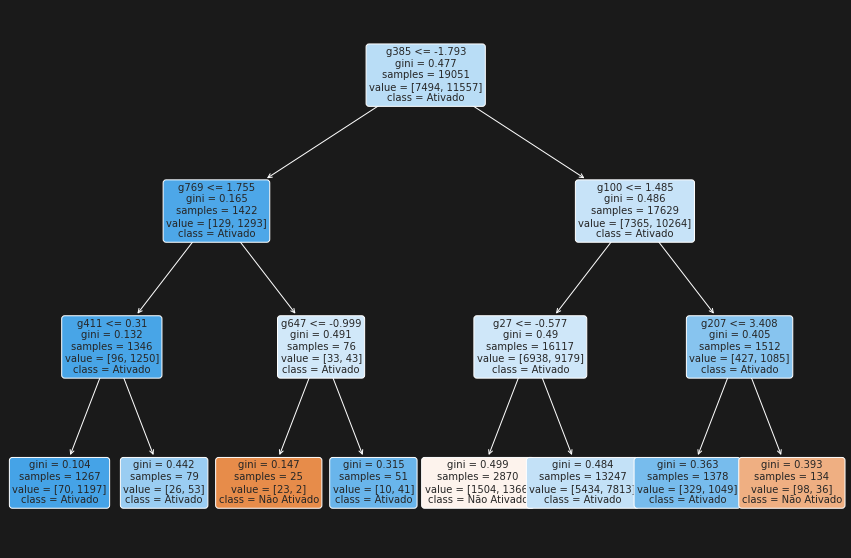

In [ ]:
#Exibição da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(15,10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names = ['Não Ativado', 'Ativado'])
plt.show()

O resultado da árvore de decisão foi de cerca de 61%, não foi tão bom também. Talvez o aumento da quantidade de níveis da árvore de decisão possa nos trazer resultados melhores.

Testei o modelo em diferentes níveis de profundidade (de 1 a 14), e exibi os resultados em gráfico para ver há melhora na acurácia.

In [ ]:
#Listas vazias para armazenar os resultados do treino e do teste em diferentes níveis de profundidade
teste=[]
treino=[]

#loop do modelo de árvore de decisão
for i in range(1,15): 
  modelo_arvore = DecisionTreeClassifier(max_depth=i)
  modelo_arvore.fit(x_treino, y_treino)
  teste.append(modelo_arvore.score(x_teste, y_teste))
  treino.append(modelo_arvore.score(x_treino, y_treino))

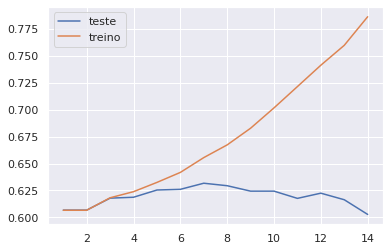

In [ ]:
#Plot de um gráfico de linhas, sendo o eixo x o aumento dos níveis da árvore de decisão
sns.lineplot(x=range(1,15), y=teste, label='teste')
sns.lineplot(x=range(1,15), y=treino, label='treino')

Perceba que os dados de treino estão melhorando muito os resultado, mas aparentemente, a partir do depth nível 7, os resultados começam a piorar.
Isso é chamado de overfitting [7], quando um modelo se adaptou tão bem ao treino que deixou de ser bom para receber dados jamais vistos.

Para resolver o overfitting da árvore de decisão, podemos diminuir os níveis de profundidade até o 7, que de acordo com o gráfico parece razoável, mas a acurácia do modelo não sobe tanto assim.

Testei um outro modelo chamado random forest, que formam várias árvores de decisão para realizar as classificações.

####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Para esse modelo, acrescentarei nos dados de treino os dados categóricos dummie (tratamento, dose e tempo).

In [ ]:
#Dados de treino e validação
x = dados_dummies.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
y = dados_dummies['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=847)

In [ ]:
#Modelo random forest
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.6869619987402897

A acurácia do modelo foi um pouco acima dos modelos anteriores, mas ainda parece insatisfatório.

###Previsão de compostos

Aqui foi feito um estudo de possibilidade de se prever compostos químicos utilizados, baseando nos resultados de variação na expressão genética e alteração na viabilidade celular.

O número de MoA ativados ou a simples ativação dos mesmos foi ignorada para o modelo também. 

Separei uma lista com os 4 compostos que mais aparecem, ignorando o placebo do grupo de controle

In [ ]:
#variável com a lista dos top compostos
compostos_modelo = dados['composto'].value_counts().index[1:5]
compostos_modelo

Index(['87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [ ]:
#Obtendo um novo dataframe apenas com as linhas de compostos escolhidos
dados_filtro_composto = dados_dummies.query('composto in @compostos_modelo')

#####Dados de treino e validação

In [ ]:
#Dados de teste e validação
x = dados_filtro_composto.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
y = dados_filtro_composto['composto'].map({'87d714366':0, '9f80f3f77':1, '8b87a7a83':2, '5628cb3ee':3})
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y,random_state=847) 

#####Modelo de regressão SVC

Para essa previsão, tentarei utilizar o modelo SVC [8]. O modelo SVC é parte da libsvm, o svc utiliza uma base de dados de treino e a separa em parte de classificação, assim, quando um dado de entrada é recebido o modelo procura prever em qual grupo o dado se encontra e o classifica.

Nesse modelo há um parâmetro chamado class_weight para setar o peso de cada classe a ser prevista ou se estão balanceadas. Eu não utilizei pois a documentação diz que se isso não é informado, automaticamente se usa a variável y de modo inversamente proporcional as frequências.

In [ ]:
#Importação de bibiliotecas
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
#modelo SVC
modelo_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
modelo_svc.fit(x_treino, y_treino)
modelo_svc.score(x_teste, y_teste)

0.9963503649635036

Perceba que o modelo conseguiu ser mais de 99% assertivo em prever os compostos utilizados com base nos outros dados. Vale ressaltar que aqui os dados foram restringidos apenas para 4 compostos, o que pode facilitar para o aprendizado caso o comportamento dos compostos sejam totalmente diferentes, mas esse modelo não se aplica a toda a base de dados devido a restrição.

###Previsão de tipo de tratamento

Suponhamento que o laboratório, por alguma razão, perca a classificação de quais resultados foram tratados com algum composto químico ou se fazem parte do grupo de controle.

Esse modelo tem como objetivo simular uma possível previsão para mitigar esse problema.

####Dados de treino e validação

In [ ]:
#dados de treino
x = dados_dummies.drop(['id', 'n_moa', 'ativo_moa', 'composto', 'tratamento_com_controle', 'tratamento_com_droga'], axis=1)
y = dados_dummies['tratamento_com_controle']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=847)

Testei dois modelos para verificar o melhor resultado entre os dois.

####Modelo de regressão logística

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
#treino do modelo
modelo_rlogistica.fit(x_treino, y_treino)
#score do modelo (acurácia)
modelo_rlogistica.score(x_teste, y_teste)

0.94625236195675

####Modelo random forest

In [ ]:
#Modelo random forest
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.928826369934915

Também decidi verificar novamente o dummy classifier para esse caso, para ter certeza que o nosso modelo é significativo em relação a um modelo mais simples.

####Dummy classifier

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.9216880117572959

Perceba que o nosso modelo está um pouco acima do dummy novamente, ou seja, considerando o dados mais frequentes das labels de tratamento com_controle, eu consigo ter uma acurácia de 92%. O Dummy acerta esse valor, por supor que tudo seja parte do tratamento com_droga, e a proporção dos dados que estão classificados com esse tratamento, é exatamente essa.

##Conclusões

A partir dos modelos testados, é possível concluir que a previsão de ativação de MoA não se apresentou tão satisfatória, visto que a acurácia ficou entre 60 e 70 por cento para a previsão de ativação. Como estamos tratando de drug discovery, a falta de acurácia pode resultar em resultados graves e efeitos colaterais inesperados.

Já a previsão de compostos foi satisfatória em uma base de dados controlada com apenas 4 compostos. Isso pode indicar que o aprendizados com mais compostos pode trazer bons resultados. Mas esse modelo não serve para prever os compostos da nossa base completa, por exemplo.

A previsão da label de tratamento obteve resultados excelentes também, chegando a mais de 94% de acurácia com a regressão logística. Mas também vale ressaltar que o Dummy Classifier também obteve resultados satisfatórios, isso porque a pergunta feita foi simples para o modelo, e a proporção dos dados é de 92% para uma das classificações.

De qualquer forma, espero que as técnicas aqui utilizadas sirvam de exemplo para outras aplicações e explorações futuras. 

##Agradecimentos

A imersão dados da Alura [10] foi de extrema importância para esse projeto de data science. Todo o material disponível, as claras explicações sobre assuntos complexos, a disponibilidade na comunidade foram essenciais para que esse projeto fosse finalizado dessa forma.

É o início de um caminho longo, mas muito incrível.

Obrigado Guilherme Silveira, Thiago Gonçalves e Vanessa Leiko. Sem a ajuda de vocês, teria sido mil vezes mais complicado.

Obrigado também a todo mundo da comunidade que se dispôs a ajudar no Discord, todos foram incríveis.

##Contatos

**Alyster Fernandes**

[GitHub](https://github.com/AlysterF) | [LinkedIn](https://www.linkedin.com/in/alysterfernandes/)

##Referências

[1][Drug Discovery: passado, presente e futuro](https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit)

[2] [Expressão gênica: o caminho da informação biológica](https://drive.google.com/file/d/1VNP08ffCiGD8cqaBkdHATWSX8Yxfm3dj/view)

[3] [Grupo de controle](https://pt.wikipedia.org/wiki/Grupo_de_controle#:~:text=Um%20grupo%20de%20controle%20cient%C3%ADfico,dois%20experimentos%20id%C3%AAnticos%20s%C3%A3o%20conduzidos.)

[4] [Regressão logística](http://www.portalaction.com.br/analise-de-regressao/regressao-logistica#:~:text=O%20modelo%20de%20regress%C3%A3o%20log%C3%ADstica,e%20%22sucesso%22%2C%20respectivamente.&text=O%20modelo%20de%20regress%C3%A3o%20log%C3%ADstica,e%20%22sucesso%22%2C%20respectivamente.)

[5] [Dummy classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

[6] [Árvores de Decisão](https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69)

[7] [Sobreajuste (Overfitting)](https://pt.wikipedia.org/wiki/Sobreajuste)

[8] [Supporting Vector Classifier (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[9] [SciKit Learn](https://scikit-learn.org/stable/)

[10] [Alura](https://www.alura.com.br/)